In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [12]:
data = pd.read_csv('/Users/rajji/Desktop/EM.csv')
print(data.head())

   Creditscore Creditscoreindicator  Likelihoodoffailure  CreditlimitGBPGBP  \
0           92               Secure                  0.9         50000000.0   
1           92               Secure                  0.9         50000000.0   
2           95               Secure                  0.9         16574000.0   
3           89               Secure                  0.9          5380000.0   
4           99               Secure                  0.9         50000000.0   

   Previouscreditscore SMEindicator  ReturnonTotalAssets2020  \
0                 95.0           No                      NaN   
1                 99.0           No                -0.130484   
2                 99.0           No                      NaN   
3                 92.0           No                      NaN   
4                 99.0           No                21.144665   

   ReturnonTotalAssets2019  ReturnonShareholdersFunds2020  \
0                 5.614489                            NaN   
1                 

In [13]:
# Display the first few rows of the dataset and a summary of the data
data_info = data.info()
data_head = data.head()
data_description = data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8176 entries, 0 to 8175
Data columns (total 72 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Creditscore                      8176 non-null   int64  
 1   Creditscoreindicator             8176 non-null   object 
 2   Likelihoodoffailure              8107 non-null   float64
 3   CreditlimitGBPGBP                6771 non-null   float64
 4   Previouscreditscore              7740 non-null   float64
 5   SMEindicator                     8176 non-null   object 
 6   ReturnonTotalAssets2020          2981 non-null   float64
 7   ReturnonTotalAssets2019          6773 non-null   float64
 8   ReturnonShareholdersFunds2020    2443 non-null   float64
 9   ReturnonShareholdersFunds2019    5456 non-null   float64
 10  ReturnonCapitalEmployed2020      2913 non-null   float64
 11  ReturnonCapitalEmployed2019      6601 non-null   float64
 12  TurnoverthGBP2020   

In [14]:
(data_info, data_head, data_description)

(None,
    Creditscore Creditscoreindicator  Likelihoodoffailure  CreditlimitGBPGBP  \
 0           92               Secure                  0.9         50000000.0   
 1           92               Secure                  0.9         50000000.0   
 2           95               Secure                  0.9         16574000.0   
 3           89               Secure                  0.9          5380000.0   
 4           99               Secure                  0.9         50000000.0   
 
    Previouscreditscore SMEindicator  ReturnonTotalAssets2020  \
 0                 95.0           No                      NaN   
 1                 99.0           No                -0.130484   
 2                 99.0           No                      NaN   
 3                 92.0           No                      NaN   
 4                 99.0           No                21.144665   
 
    ReturnonTotalAssets2019  ReturnonShareholdersFunds2020  \
 0                 5.614489                            Na

In [15]:
features = ['Creditscore', 'ReturnonTotalAssets2019']

In [16]:
statistics = data[features].describe()
print("Descriptive Statistics:")
print(statistics)

Descriptive Statistics:
       Creditscore  ReturnonTotalAssets2019
count  8176.000000              6773.000000
mean     57.300514                22.988502
std      29.730987               105.484711
min      15.000000              -912.765957
25%      29.000000                 0.058547
50%      45.000000                 6.909952
75%      90.000000                24.904707
max      99.000000               977.934426


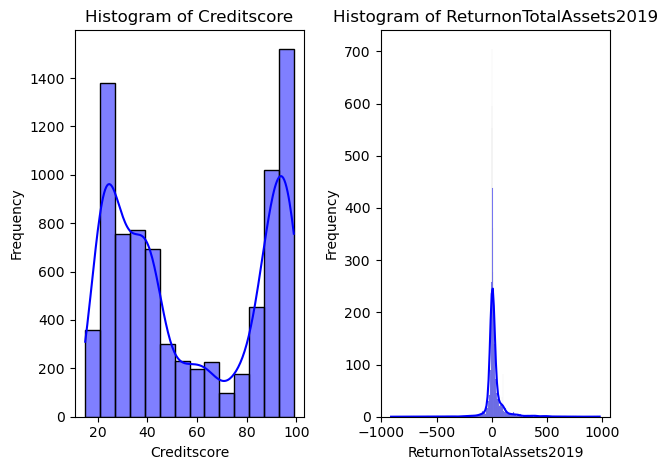

In [17]:
for i, feature in enumerate(features, 1):
    plt.subplot(1, 2, i)
    sns.histplot(data[feature], kde=True, color='blue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

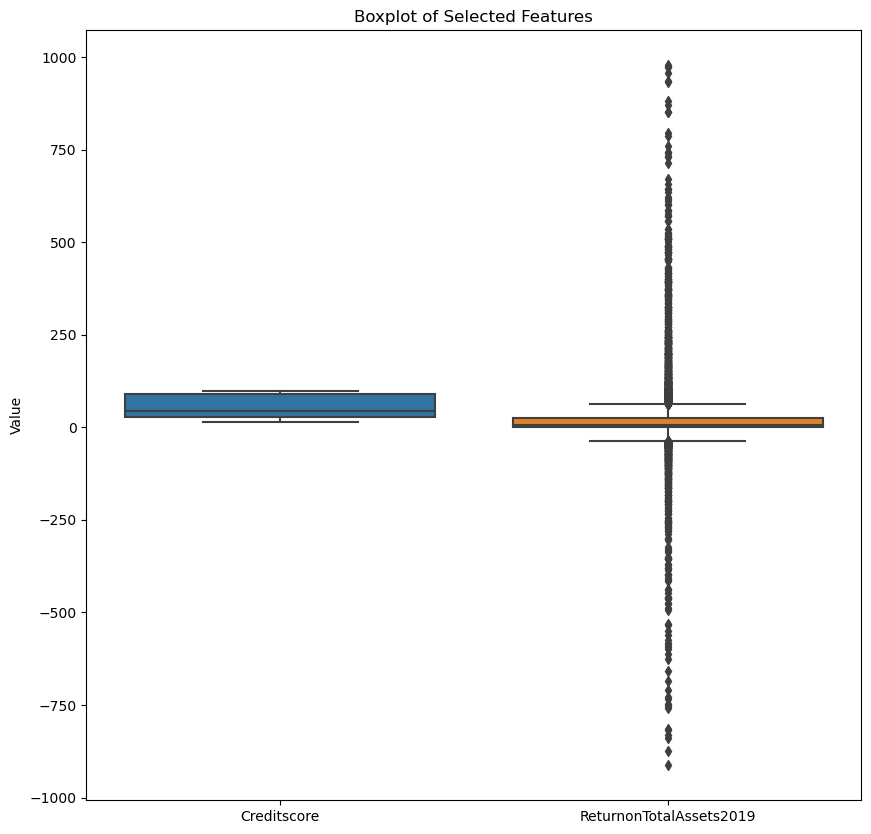

In [18]:
# Plotting boxplots for each selected feature to identify outliers
plt.figure(figsize=(10, 10))
sns.boxplot(data=data[features])
plt.title('Boxplot of Selected Features')
plt.ylabel('Value')
plt.show()

In [19]:
mean_creditscore = data['Creditscore'].mean()

In [20]:
print (mean_creditscore)

57.300513698630134


In [21]:
data['CreditLevel'] = (data['Creditscore'] > mean_creditscore).astype(int)
print(data['CreditLevel'])

0       1
1       1
2       1
3       1
4       1
       ..
8171    0
8172    0
8173    0
8174    0
8175    1
Name: CreditLevel, Length: 8176, dtype: int64


/Users/rajji/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


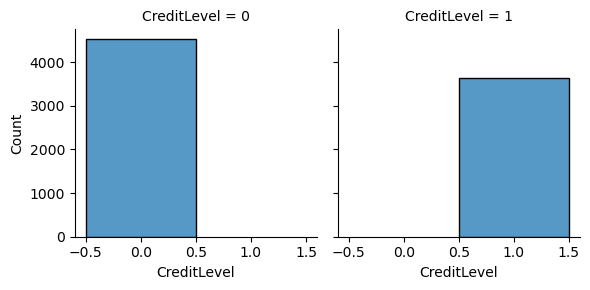

In [22]:
chart = sns.FacetGrid(data, col='CreditLevel')  
chart.map(sns.histplot, 'CreditLevel')   

In [83]:
data.describe()

,Creditscore,Likelihoodoffailure,CreditlimitGBPGBP,Previouscreditscore,ReturnonTotalAssets2020,ReturnonTotalAssets2019,ReturnonShareholdersFunds2020,ReturnonShareholdersFunds2019,ReturnonCapitalEmployed2020,ReturnonCapitalEmployed2019,...,ShareholdersFundsthGBP2019,TaxationthGBP2020,TaxationthGBP2019,Grossmargin2020,Grossmargin2019,Currentratiox2020,Currentratiox2019,SolvencyratioLiabilitybased2020,SolvencyratioLiabilitybased2019,CreditLevel
count,8176.000000,8107.000000,6.771000e+03,7740.000000,2981.000000,6773.000000,2443.000000,5456.000000,2913.000000,6601.000000,...,7.707000e+03,2020.000000,5075.000000,1676.000000,4552.000000,3018.000000,6724.000000,1385.000000,3075.000000,8176.000000
mean,57.300514,5.222030,5.292997e+05,60.431912,27.903380,22.988502,65.895390,51.214527,51.135009,38.020029,...,1.070198e+04,-536.391740,-489.853105,44.991604,40.828643,4.137871,3.331513,35.770585,36.916356,0.446184
std,29.730987,4.402007,2.983264e+06,29.744458,122.359699,105.484711,160.958270,142.652371,159.209969,141.429108,...,1.020021e+05,5486.814104,4972.515365,33.273956,30.629930,9.685434,7.609185,28.776699,28.611943,0.497126
min,15.000000,0.900000,5.000000e+02,12.000000,-986.769231,-912.765957,-986.769231,-962.567310,-986.769231,-982.024945,...,-6.797920e+05,-138300.000000,-170400.000000,-92.670157,-96.103896,0.000210,0.000002,0.000089,0.000056,0.000000
25%,29.000000,0.900000,5.000000e+02,31.000000,0.258019,0.058547,5.022592,4.357923,1.600826,1.272559,...,8.805000e-01,-111.152750,-180.526000,18.999768,18.746543,0.978612,0.918068,10.216751,11.334873,0.000000
50%,45.000000,4.500000,1.543000e+04,57.000000,8.895044,6.909952,25.345375,19.642117,18.210079,14.065986,...,8.379200e+01,-6.967000,-17.631000,35.722637,32.407668,1.536642,1.411439,29.856705,31.473657,0.000000
75%,90.000000,10.600000,2.342970e+05,92.000000,44.012601,24.904707,95.714174,64.367905,82.183945,51.639653,...,3.791737e+03,-0.626750,-0.558500,73.842839,59.381827,3.223637,2.763619,56.823166,59.481722,1.000000
max,99.000000,19.400000,5.000000e+07,99.000000,815.362798,977.934426,991.539401,996.705178,991.539401,990.810811,...,4.862100e+06,15584.000000,36666.000000,100.000000,100.000000,97.166667,99.593883,100.000000,100.000000,1.000000


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8176 entries, 0 to 8175
Data columns (total 73 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Creditscore                      8176 non-null   int64  
 1   Creditscoreindicator             8176 non-null   object 
 2   Likelihoodoffailure              8107 non-null   float64
 3   CreditlimitGBPGBP                6771 non-null   float64
 4   Previouscreditscore              7740 non-null   float64
 5   SMEindicator                     8176 non-null   object 
 6   ReturnonTotalAssets2020          2981 non-null   float64
 7   ReturnonTotalAssets2019          6773 non-null   float64
 8   ReturnonShareholdersFunds2020    2443 non-null   float64
 9   ReturnonShareholdersFunds2019    5456 non-null   float64
 10  ReturnonCapitalEmployed2020      2913 non-null   float64
 11  ReturnonCapitalEmployed2019      6601 non-null   float64
 12  TurnoverthGBP2020   

In [24]:
#Set target variable y(Credit_Level 0 or 1 )and features x 
X = data.iloc[:, 5:-1] 
Y = data.iloc[:, -1]

In [111]:
X

,SMEindicator,ReturnonTotalAssets2020,ReturnonTotalAssets2019,ReturnonShareholdersFunds2020,ReturnonShareholdersFunds2019,ReturnonCapitalEmployed2020,ReturnonCapitalEmployed2019,TurnoverthGBP2020,TurnoverthGBP2019,NetAssetsTurnoverx2020,...,ShareholdersFundsthGBP2020,ShareholdersFundsthGBP2019,TaxationthGBP2020,TaxationthGBP2019,Grossmargin2020,Grossmargin2019,Currentratiox2020,Currentratiox2019,SolvencyratioLiabilitybased2020,SolvencyratioLiabilitybased2019
0,No,NaN,5.614489,NaN,10.284360,NaN,8.326938,NaN,6667000.000,NaN,...,NaN,2110000.000,NaN,-50000.0,NaN,37.888106,NaN,1.224782,NaN,NaN
1,No,-0.130484,2.832746,-0.283735,7.000426,-0.175859,4.070147,6157500.0,6955700.000,1.406304,...,2713800.000,2582700.000,-14200.0,-58000.0,29.740966,29.250830,1.474780,1.300454,85.144166,67.969367
2,No,NaN,3.817802,NaN,18.074145,NaN,15.152711,NaN,5915844.000,NaN,...,NaN,397247.000,NaN,-19589.0,NaN,13.304340,NaN,0.892335,NaN,26.779674
3,No,NaN,-5.702719,NaN,-67.554766,NaN,-15.251972,NaN,4506100.000,NaN,...,NaN,168900.000,NaN,-3300.0,NaN,10.490224,NaN,0.921290,NaN,9.219936
4,No,21.144665,26.910621,169.535674,130.534489,28.898498,45.933410,4266200.0,4167400.000,1.647118,...,441500.000,553800.000,-138300.0,-132500.0,38.453425,35.374574,2.058749,1.826697,14.249290,25.969519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8171,Yes,NaN,51.344614,NaN,92.855191,NaN,82.954989,NaN,129.832,NaN,...,31.868,36.600,NaN,NaN,NaN,NaN,1.778772,1.566767,30.805815,NaN
8172,Unconfirmed,NaN,-73.025732,NaN,NaN,NaN,-73.025732,NaN,1.127,NaN,...,NaN,-0.823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8173,Yes,NaN,94.231524,NaN,NaN,NaN,154.809464,NaN,409.369,NaN,...,92.061,NaN,NaN,NaN,NaN,66.903454,0.962697,1.445911,NaN,NaN
8174,Yes,NaN,-100.000000,NaN,NaN,NaN,NaN,NaN,11.643,NaN,...,-13.702,NaN,NaN,NaN,NaN,16.189985,NaN,1.000000,NaN,NaN


In [113]:
# Split the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, 
                                   shuffle=False)
X_test

,SMEindicator,ReturnonTotalAssets2020,ReturnonTotalAssets2019,ReturnonShareholdersFunds2020,ReturnonShareholdersFunds2019,ReturnonCapitalEmployed2020,ReturnonCapitalEmployed2019,TurnoverthGBP2020,TurnoverthGBP2019,NetAssetsTurnoverx2020,...,ShareholdersFundsthGBP2020,ShareholdersFundsthGBP2019,TaxationthGBP2020,TaxationthGBP2019,Grossmargin2020,Grossmargin2019,Currentratiox2020,Currentratiox2019,SolvencyratioLiabilitybased2020,SolvencyratioLiabilitybased2019
5723,Yes,NaN,NaN,NaN,NaN,NaN,NaN,41.180,35.000,411.800000,...,0.100,0.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5724,Yes,95.575424,18.845985,NaN,NaN,98.674556,21.491118,41.016,13.454,4.853964,...,-3.153,-9.772,NaN,NaN,100.0,100.000000,3.105839,0.738859,NaN,NaN
5725,Yes,NaN,-0.157703,NaN,-0.167770,NaN,-0.157703,NaN,41.000,NaN,...,NaN,11325.000,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN
5726,Yes,-27.379400,NaN,-75.134168,NaN,-75.134168,NaN,44.410,NaN,953.345259,...,0.043,NaN,NaN,NaN,NaN,NaN,1.573333,NaN,57.333333,NaN
5727,Yes,380.409731,43.064447,380.409731,43.064447,380.409731,43.064447,40.780,23.171,17.405036,...,2.343,2.343,-1.693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8171,Yes,NaN,51.344614,NaN,92.855191,NaN,82.954989,NaN,129.832,NaN,...,31.868,36.600,NaN,NaN,NaN,NaN,1.778772,1.566767,30.805815,NaN
8172,Unconfirmed,NaN,-73.025732,NaN,NaN,NaN,-73.025732,NaN,1.127,NaN,...,NaN,-0.823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8173,Yes,NaN,94.231524,NaN,NaN,NaN,154.809464,NaN,409.369,NaN,...,92.061,NaN,NaN,NaN,NaN,66.903454,0.962697,1.445911,NaN,NaN
8174,Yes,NaN,-100.000000,NaN,NaN,NaN,NaN,NaN,11.643,NaN,...,-13.702,NaN,NaN,NaN,NaN,16.189985,NaN,1.000000,NaN,NaN


In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [144]:
# Keep only numerical features and exclude the target variable
X = data.select_dtypes(include=[np.number]).drop(columns=['CreditLevel'])

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Define the target variable
Y = data['CreditLevel'].values

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=123)

# Initialize and train Logistic Regression model
logistic_model = LogisticRegression(random_state=101)
logistic_model.fit(X_train, Y_train)
# Make predictions with Logistic Regression model
logistic_predictions = logistic_model.predict(X_test)

Y_pred = modellr.predict(X_test)

print (classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.99      0.99      0.99      1097

    accuracy                           0.99      2453
   macro avg       0.99      0.99      0.99      2453
weighted avg       0.99      0.99      0.99      2453



In [129]:
from sklearn.ensemble import ExtraTreesClassifier

# Model
modelet = ExtraTreesClassifier(random_state=101)
# Train the model
modelet.fit(X_train, Y_train)
# Predict on the test set
Y_pred = modelet.predict(X_test)

# Assuming classification_report has been imported previously
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1356
           1       0.99      0.99      0.99      1097

    accuracy                           0.99      2453
   macro avg       0.99      0.99      0.99      2453
weighted avg       0.99      0.99      0.99      2453



In [140]:

# Keep only numerical features
X = data.select_dtypes(include=[np.number]).drop(columns=['CreditLevel'])

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Define the target variable
Y = data['CreditLevel'].values

# Initialize models
logistic_model = LogisticRegression(random_state=101)
extra_trees_model = ExtraTreesClassifier(random_state=101)

# Perform cross-validation
logistic_cv_scores = cross_val_score(logistic_model, X_scaled, Y, cv=5)
extra_trees_cv_scores = cross_val_score(extra_trees_model, X_scaled, Y, cv=5)

# Print the cross-validation scores for Logistic Regression
print("Logistic Regression - Mean CV Score:", logistic_cv_scores.mean())
print("Logistic Regression - Std CV Score:", logistic_cv_scores.std())

# Print the cross-validation scores for Extra Trees Classifier
print("Extra Trees Classifier - Mean CV Score:", extra_trees_cv_scores.mean())
print("Extra Trees Classifier - Std CV Score:", extra_trees_cv_scores.std())


Logistic Regression - Mean CV Score: 0.9880154475374413
Logistic Regression - Std CV Score: 0.010248875769565386
Extra Trees Classifier - Mean CV Score: 0.977130317100708
Extra Trees Classifier - Std CV Score: 0.025174558182327427


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

Y = data['CreditLevel']

# Keep only numerical data from the features
X = data.drop(columns=['CreditLevel']).select_dtypes(include=[np.number])

# Fill missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
                                                 
# Standardize the numerical data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=123)

# Print shapes of the datasets to confirm sizes
print("Train set shape:", X_train.shape, Y_train.shape)
print("Test set shape:", X_test.shape, Y_test.shape)

Train set shape: (5723, 70) (5723,)
Test set shape: (2453, 70) (2453,)


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize Logistic Regression model with a random state for reproducibility
logistic_model = LogisticRegression(random_state=123)

# Fit the Logistic Regression model on the training data
logistic_model.fit(X_train, Y_train)

# Use the fitted model to make predictions on the test data
Y_pred = logistic_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

# Print out the results
print("Accuracy of the model:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy of the model: 0.9926620464737057
Confusion Matrix:
 [[1347    9]
 [   9 1088]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.99      0.99      0.99      1097

    accuracy                           0.99      2453
   macro avg       0.99      0.99      0.99      2453
weighted avg       0.99      0.99      0.99      2453



In [35]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Extra Trees Classifier model
extra_trees_model = ExtraTreesClassifier(random_state=123)

# Fit the Extra Trees Classifier model on the training data
extra_trees_model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = extra_trees_model.predict(X_test)

# Evaluate the predictions
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

# Feature importances can be obtained from the trained model
feature_importances = extra_trees_model.feature_importances_
print('Feature Importances:', feature_importances)

Accuracy: 0.9951080309824705
Confusion Matrix:
 [[1347    9]
 [   3 1094]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1356
           1       0.99      1.00      0.99      1097

    accuracy                           1.00      2453
   macro avg       0.99      1.00      1.00      2453
weighted avg       1.00      1.00      1.00      2453

Feature Importances: [4.40213130e-01 2.35671890e-01 5.34055705e-03 1.51004030e-01
 2.05966182e-03 4.91766715e-03 1.45176715e-03 5.95796093e-03
 1.36452169e-03 3.61656196e-03 1.90956762e-03 2.52196159e-03
 1.62268370e-03 3.07599487e-03 3.09943036e-03 6.46504079e-03
 1.15704414e-03 8.75487446e-03 2.02876100e-03 3.60564332e-03
 2.66327702e-03 2.23380173e-03 9.58062179e-04 2.92082688e-03
 8.26804107e-04 2.83822189e-03 1.35787355e-03 5.32416202e-03
 1.36846323e-03 2.62707074e-03 1.19480846e-03 1.89120531e-03
 1.72205147e-03 1.90264932e-03 1.09470719e-03 2.09572586e-03
 1.1

In [37]:
from sklearn.model_selection import cross_val_score

# Assuming that LogisticRegression and ExtraTreesClassifier have been imported and are available.
# Also assuming that X_scaled and Y have been properly defined as per previous instructions.

# Initialize models
logistic = LogisticRegression(random_state=101)
extra_trees = ExtraTreesClassifier(random_state=101)

# Perform cross-validation for Logistic Regression
logistic_cv_scores = cross_val_score(logistic, X_scaled, Y, cv=5, scoring='accuracy')

# Calculate mean and standard deviation for Logistic Regression
logistic_cv_mean = logistic_cv_scores.mean()
logistic_cv_std = logistic_cv_scores.std()

# Print the results for Logistic Regression
print("Logistic Regression CV Mean Accuracy:", logistic_cv_mean)
print("Logistic Regression CV Std of Accuracy:", logistic_cv_std)

Logistic Regression CV Mean Accuracy: 0.9887488690996913
Logistic Regression CV Std of Accuracy: 0.009040515977505


In [38]:
# Perform cross-validation for Extra Trees Classifier
extra_trees_cv_scores = cross_val_score(extra_trees, X_scaled, Y, cv=5, scoring='accuracy')

# Calculate mean and standard deviation for Extra Trees Classifier
extra_trees_cv_mean = extra_trees_cv_scores.mean()
extra_trees_cv_std = extra_trees_cv_scores.std()

# Print the results for Extra Trees Classifier
print("Extra Trees Classifier CV Mean Accuracy:", extra_trees_cv_mean)
print("Extra Trees Classifier CV Std of Accuracy:", extra_trees_cv_std)

Extra Trees Classifier CV Mean Accuracy: 0.9782315336129741
Extra Trees Classifier CV Std of Accuracy: 0.023347990313329264


Classification Report for Extra Trees Classifier:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1356
           1       0.99      1.00      0.99      1097

    accuracy                           1.00      2453
   macro avg       0.99      1.00      1.00      2453
weighted avg       1.00      1.00      1.00      2453



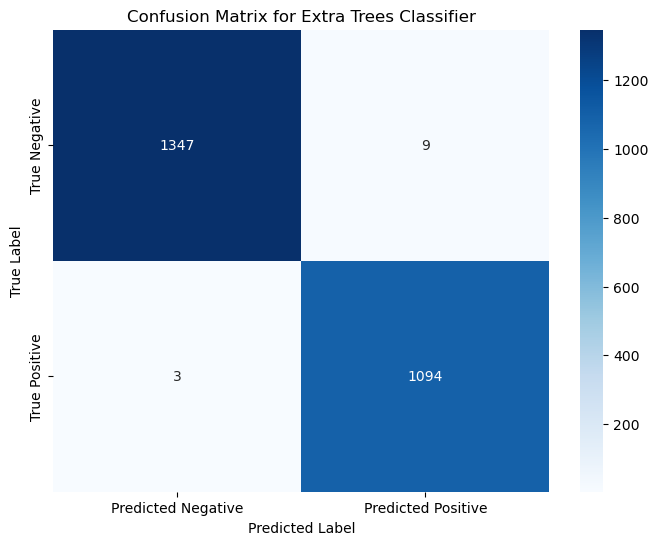

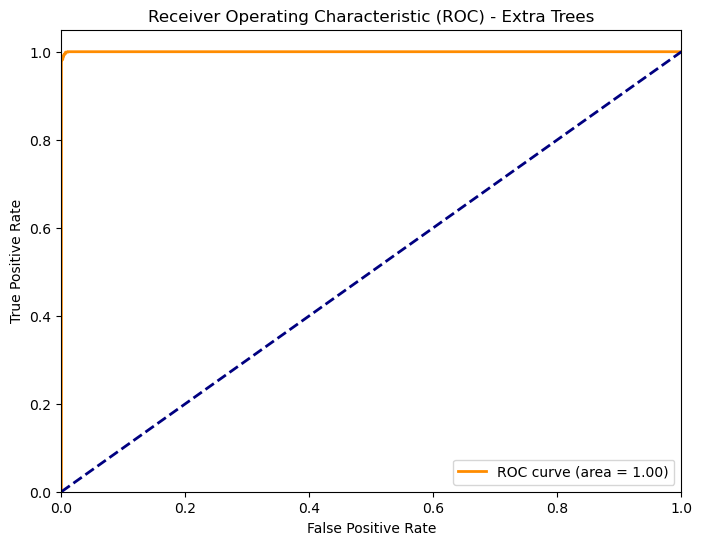

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming ExtraTreesClassifier has been trained as `extra_trees_model` on `X_train` and `Y_train`
# and that `X_test` and `Y_test` are already defined

# Predict on the test set
Y_pred_et = extra_trees_model.predict(X_test)
Y_proba_et = extra_trees_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Classification report
print("Classification Report for Extra Trees Classifier:")
print(classification_report(Y_test, Y_pred_et))

# Confusion matrix
cm = confusion_matrix(Y_test, Y_pred_et)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Extra Trees Classifier')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_proba_et)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Extra Trees')
plt.legend(loc="lower right")
plt.show()